### Import libraries & dependancies




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm.notebook import tqdm


###Data

In [ ]:
n=500
m=100
k=10
np.random.seed(12)
A = np.random.rand(m, n)
x = np.zeros(n)
indices = np.random.choice(n, size=k, replace=False)
values = np.random.randn(k)
x[indices] = values

y=A@x+ np.random.normal(0, 1, size=(m,))

In [ ]:
A

array([[0.15416284, 0.7400497 , 0.26331502, ..., 0.09204979, 0.08285077,
        0.53911986],
       [0.30964212, 0.67163854, 0.28185479, ..., 0.86826822, 0.76266046,
        0.21399387],
       [0.69191492, 0.6328783 , 0.58106497, ..., 0.8094376 , 0.14948792,
        0.9370676 ],
       ...,
       [0.68627919, 0.47962638, 0.83515003, ..., 0.48488857, 0.62103788,
        0.00873272],
       [0.41390959, 0.41047041, 0.11179232, ..., 0.68323414, 0.73791214,
        0.7440044 ],
       [0.87741819, 0.39747798, 0.10934323, ..., 0.34997345, 0.98414673,
        0.29557335]])

In [ ]:
eigenvalues = np.linalg.eigvals(A.T@A)
max_eig_val=np.max(eigenvalues)
max_eig_val

(12511.493163497176+0j)

In [ ]:
y

array([ 1.29072659,  0.5713919 ,  0.19379024,  2.04739526,  1.81798013,
       -0.95598171,  1.07480985, -0.14166145, -0.03806401,  3.40330903,
        0.68394006,  2.52085208, -0.97795664,  0.7301648 , -0.44498955,
       -0.6134693 ,  1.64866167, -0.52495066, -1.44110601,  3.39668846,
        0.63034741,  0.01341712,  1.18942838,  2.44936807,  1.05330705,
        2.14253785, -0.34845516,  2.20214953, -0.34119959,  3.91086807,
        0.6444279 ,  1.68963354,  1.57198997,  0.56980381,  0.72009842,
        0.11822223,  1.9484303 ,  0.61771095,  2.47965937,  4.43597362,
       -0.09240354,  0.87271281,  1.46281497,  0.5555422 ,  1.25202835,
        1.32584618, -0.26062006,  1.15320869,  0.12736543,  0.6106174 ,
        1.31187488,  2.60837724,  2.28315479,  0.31051732,  1.06275077,
        0.54192044, -1.21219223,  2.66100984,  0.72747214, -0.90733697,
        1.79788546,  3.01863154,  0.71682457,  2.96729539,  2.09335203,
       -1.69004344,  1.39279679,  2.60128174,  0.13584206,  0.97

In [ ]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.18618937,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
A=torch.Tensor(A)
x=torch.Tensor(x)
y=torch.Tensor(y)

In [ ]:
x

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.1862,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

###Model

In [ ]:
class ISTAStep(nn.Module):
    def __init__(self, A=A,y=y,alpha=12620,lamda=1):
        super(ISTAStep, self).__init__()
        self.A = A
        self.B = nn.Parameter(torch.tensor(torch.matmul((1/alpha)*A.transpose(0, 1),y), requires_grad=True))
        self.H = nn.Parameter(torch.tensor(torch.eye((torch.matmul(A.t(), A)).shape[0]) - (1/alpha) * torch.matmul(A.t(), A),requires_grad=True))
        self.t = nn.Parameter(torch.tensor((lamda/alpha)*torch.ones((n,))))
        self.y = y
    
    def soft_thresholding(self, u):
        sign = torch.sign(u)
        abs_u = torch.abs(u)
        thresholded_values = torch.max(abs_u - self.t, torch.zeros_like(abs_u))
        thresholded_values = sign * thresholded_values
        return thresholded_values   

    
    def forward(self, x ):
        c= self.B+ torch.matmul(self.H,x)
        x = self.soft_thresholding(c)
        return x


class  ISTA(nn.Module):
    def __init__(self, T=2, **dnet_args ):
        super(ISTA, self).__init__()
        self.dnets = nn.ModuleList([ISTAStep( **dnet_args) for i in range(T)])
    
    def step(self, u, i):
        return self.dnets[i].forward(u)
    
    def forward(self, u):
        u=torch.zeros(n)
        for i in range(len(self.dnets)):
            u = self.step(u, i)
        return u

In [ ]:
model=ISTA()

<ipython-input-17-39c2cfc46200>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.B = nn.Parameter(torch.tensor(torch.matmul((1/alpha)*A.transpose(0, 1),y), requires_grad=True))
<ipython-input-17-39c2cfc46200>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.H = nn.Parameter(torch.tensor(torch.eye((torch.matmul(A.t(), A)).shape[0]) - (1/alpha) * torch.matmul(A.t(), A),requires_grad=True))
<ipython-input-17-39c2cfc46200>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.t = nn.Parameter(torch.tensor((lamda/alpha)*torch.ones((n

###Train

In [ ]:
def train_step(x,y,model: torch.nn.Module, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
  
    train_loss= 0
  


    optimizer.zero_grad()
    output = model(y)

    loss = loss_fn(output, x)
    loss.backward()

    optimizer.step()
    train_loss += loss.item() 

    return train_loss

In [ ]:
def test_step(x,y,model: torch.nn.Module,
              loss_fn: torch.nn.Module):
    model.eval() 
  
    test_loss = 0
    with torch.no_grad():
            output = model(y)
            loss = loss_fn(output, x)
            test_loss += loss.item()
 
    return test_loss

In [ ]:
def train(x,y,model: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs):
    
    # Create empty results dictionary
    results = {"train_loss": [],
      "test_loss": []
    }
  
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(x,y,model=model,
                                loss_fn=loss_fn,
                                optimizer=optimizer)
                                
        
        test_loss = test_step(x,y,model=model,
                              loss_fn=loss_fn
                              )
      
        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"test_loss: {test_loss:.4f} | "
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

    # Return the filled results at the end of the epochs
    return results

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn =   nn.MSELoss()
model_resulrs = train(x,y,model=model, 
     optimizer=optimizer,
     loss_fn=loss_fn,
     epochs=1500,
     )

  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0366 | test_loss: 0.0365 | 
Epoch: 2 | train_loss: 0.0365 | test_loss: 0.0365 | 
Epoch: 3 | train_loss: 0.0365 | test_loss: 0.0365 | 
Epoch: 4 | train_loss: 0.0365 | test_loss: 0.0365 | 
Epoch: 5 | train_loss: 0.0365 | test_loss: 0.0364 | 
Epoch: 6 | train_loss: 0.0364 | test_loss: 0.0364 | 
Epoch: 7 | train_loss: 0.0364 | test_loss: 0.0364 | 
Epoch: 8 | train_loss: 0.0364 | test_loss: 0.0364 | 
Epoch: 9 | train_loss: 0.0364 | test_loss: 0.0364 | 
Epoch: 10 | train_loss: 0.0364 | test_loss: 0.0363 | 
Epoch: 11 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 12 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 13 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 14 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 15 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 16 | train_loss: 0.0363 | test_loss: 0.0363 | 
Epoch: 17 | train_loss: 0.0363 | test_loss: 0.0362 | 
Epoch: 18 | train_loss: 0.0362 | test_loss: 0.0362 | 
Epoch: 19 | train_loss: 0.0362 | test

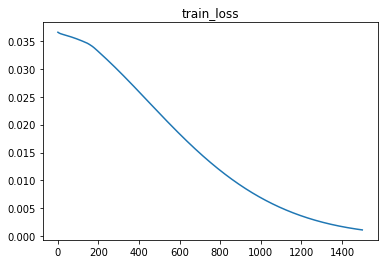

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i+1 for i in range(1500)],model_resulrs["train_loss"])
plt.title("train_loss")
plt.show()

In [ ]:
x_hat=model(y)

In [ ]:
x_hat=x_hat.detach().numpy()

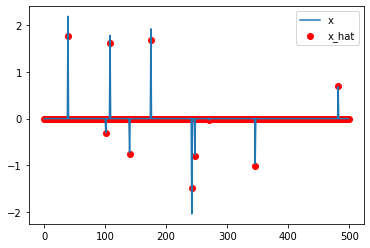

In [ ]:
plt.plot([i for i in range(n)],x)
plt.scatter([i for i in range(n)], x_hat,color='r')
plt.legend(["x", "x_hat"])
plt.show()